In [158]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import mse


In [159]:
plt.style.use('default')

In [160]:
Wage = load_data('Wage')
y = Wage['wage']
x = Wage['age']

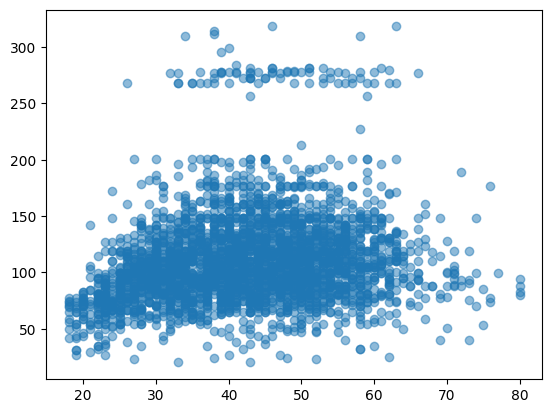

In [161]:
plt.scatter(x, y, alpha=0.5)

In [162]:
result.conf_int()

,0,1
const,-118.740798,-31.747030
x1,7.042530,13.337452
x2,-0.240302,-0.095755
x3,0.000320,0.001379


In [163]:
def draw_line(lx, params, **kwargs):
    ly = np.zeros_like(lx)
    for idx, p in enumerate(params):
        ly += p * lx**idx
    plt.plot(lx, ly, **kwargs)

def draw_plot_and_line(result, ci_lines=False):
    plt.scatter(x, y, alpha=0.5)

    xlim = plt.xlim()
    lx = np.linspace(xlim[0], xlim[1], 100)
    draw_line(lx, result.params, color='red', label=f'd={idx}')

    if ci_lines:
        ci = result.conf_int()
        draw_line(lx, ci.iloc[:, 0], color='k', linestyle='dashed')
        draw_line(lx, ci.iloc[:, 1], color='k', linestyle='dashed')

    plt.legend()
    plt.show()

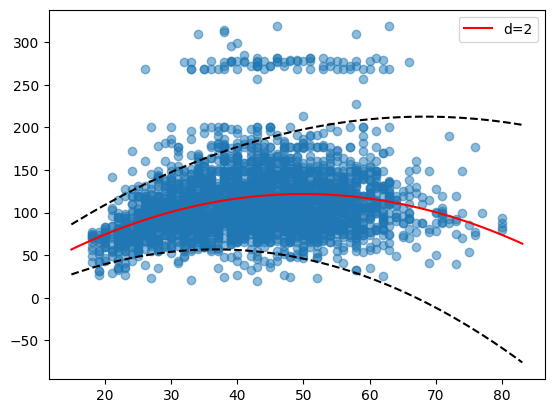

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     134.0
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           1.82e-56
Time:                        18:53:23   Log-Likelihood:                -15321.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2997   BIC:                         3.067e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.4252      8.190     -1.273      0.203     -26.483       5.633
x1             5.2940      0.389     13.620      0.000       4.532       6.056
x2            -0.0530      0.004    -11.960      0.000      -0.062      -0.044
==============================================================================
Omnibus:                     1092.673   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4915.802
Skew:                           1.715   Prob(JB):                         0.00
Kurtosis:                       8.250   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
Xp = PolynomialFeatures(degree=2).fit_transform(np.array(x).reshape(-1, 1))
model = sm.OLS(y, Xp)
result = model.fit()

draw_plot_and_line(result, True)

result.summary()

In [165]:
result.params

const   -10.425224
x1        5.294030
x2       -0.053005
dtype: float64

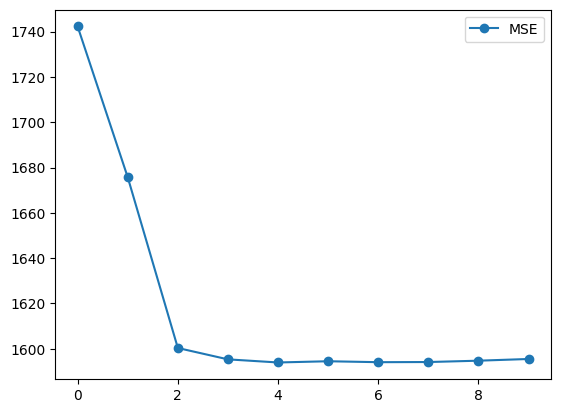

In [166]:
MSEs = np.zeros(10)
results = []

for d in range(len(MSEs)):
    Xp = PolynomialFeatures(degree=d).fit_transform(np.array(x).reshape(-1, 1))

    # For anova test
    model = sm.OLS(y, Xp)
    result = model.fit()
    results.append(result)

    cv = KFold(n_splits=10)
    for train_index, test_index in cv.split(Xp):
        model = sm.OLS(y[train_index], Xp[train_index])
        result = model.fit()
        MSEs[d] += mse(y[test_index], result.predict(Xp[test_index]))

    MSEs[d] /= cv.n_splits

plt.plot(np.arange(10), MSEs, "o-")
plt.legend(["MSE"])

In [167]:
anova_lm(*results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,5.222086e+06,0.0,NaN,NaN,NaN
1,2998.0,5.022216e+06,1.0,199869.664970,125.542985,1.419230e-28
2,2997.0,4.793430e+06,1.0,228786.010128,143.706043,2.239016e-32
3,2996.0,4.777674e+06,1.0,15755.693664,9.896533,1.672143e-03
4,2995.0,4.771604e+06,1.0,6070.152124,3.812810,5.095509e-02
5,2994.0,4.770322e+06,1.0,1282.563017,0.805609,3.694938e-01
6,2993.0,4.766389e+06,1.0,3932.257631,2.469946,1.161476e-01
7,2993.0,4.764599e+06,-0.0,1790.494628,-inf,NaN
8,2993.0,4.764136e+06,-0.0,462.435544,-inf,NaN
9,2993.0,4.764981e+06,-0.0,-844.242937,inf,NaN


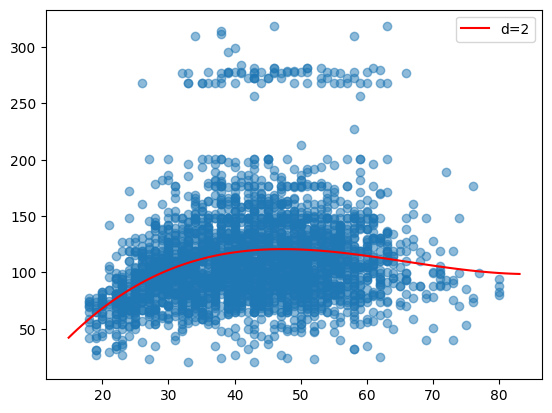

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     92.89
Date:                Sat, 20 Dec 2025   Prob (F-statistic):           1.75e-57
Time:                        18:53:24   Log-Likelihood:                -15316.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2996   BIC:                         3.066e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.2439     22.184     -3.392      0.001    -118.741     -31.747
x1            10.1900      1.605      6.348      0.000       7.043      13.337
x2            -0.1680      0.037     -4.559      0.000      -0.240      -0.096
x3             0.0008      0.000      3.143      0.002       0.000       0.001
==============================================================================
Omnibus:                     1096.742   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.829
Skew:                           1.720   Prob(JB):                         0.00
Kurtosis:                       8.282   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
Xp = PolynomialFeatures(degree=3).fit_transform(np.array(x).reshape(-1, 1))
model = sm.OLS(y, Xp)
result = model.fit()

draw_plot_and_line(result)

result.summary()

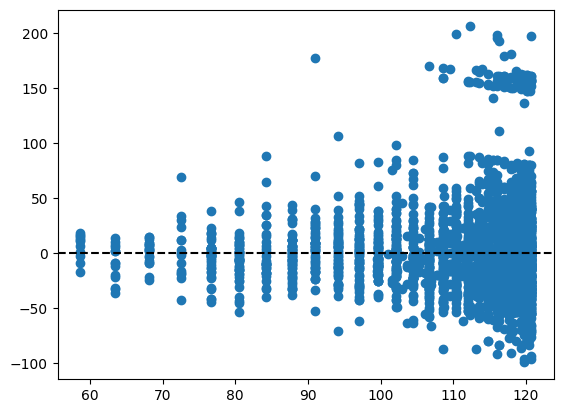

In [169]:
plt.scatter(result.fittedvalues, result.resid)
plt.axhline(y=0, color='k', linestyle='--')